In [2]:
import pandas as pd
import os

# Current working directory (where Carnets starts)
print(os.getcwd())

# List all files in that folder
print(os.listdir())

/private/var/mobile/Library/Mobile Documents/iCloud~AsheKube~Carnets/Documents
['welcome', '.ipynb_checkpoints', 'UberDataset.csv', 'Untitled.ipynb']


# Reading and Cleaning Data

In [3]:
# Read and view first 5 rows of the dataset
df=pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#understand the number of rows and columns of the dataset
df.shape

(1156, 7)

In [5]:
#summary of the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
# a descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
# understand the number of NA entries across columns
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
# look out for duplicated entries
df.duplicated().sum()

1

In [9]:
# showing also the first occurence of the duplicated entry
duplicates=df[(df.duplicated(keep=False))]
duplicates

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
491,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [10]:
#remove the duplicated entry and made sure the changes are applied to the dataframe
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# look at the number of unique values under purpose column
df['PURPOSE'].value_counts()

PURPOSE
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

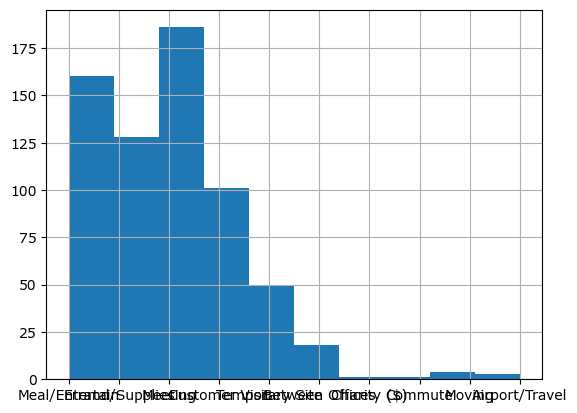

In [13]:
# Plot histogram on the trip purposes
df['PURPOSE'].hist(bins=10)

plt.title=('Distribution of trip purposes')
plt.xlabel=('Purpose')
plt.ylabel=('Number of trips')
plt.show()


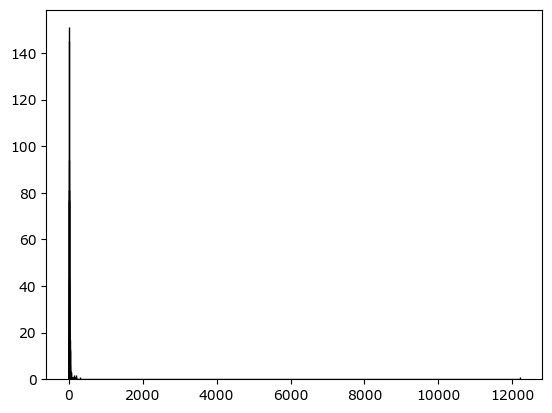

In [14]:
# Visualise in Trip Distance
data=df['MILES']
step = 1  # bin width
plt.hist(data, 
         bins=np.arange(data.min(),
                        data.max() + step,
                        step),
         edgecolor="black") # by using np.arange,we can determine the min and max based on the x label range 


plt.title=('Distribution of distances')
plt.xlabel=('Miles')
plt.ylabel=('Number of trips')
plt.show()



# Feature Engineering

In [15]:
from dateutil.parser import parse

df['START_DAY']=pd.to_datetime(df['START_DATE'], errors='coerce')
df['START_DAY']=df['START_DAY'].dt.strftime('%A')
df=df.dropna(subset=(['START_DAY']))
df['START_DAY']


0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1043       Monday
1044       Monday
1045       Monday
1046       Monday
1047       Monday
Name: START_DAY, Length: 421, dtype: object

In [16]:
day_count=df['START_DAY'].value_counts().reset_index()

In [17]:
day_count.columns=('Day','Counts')
day_count

,Day,Counts
0,Friday,87
1,Monday,62
2,Tuesday,61
3,Thursday,61
4,Saturday,52
5,Wednesday,50
6,Sunday,48


<Axes: title={'center': 'Number of trips per day'}, xlabel='Day'>

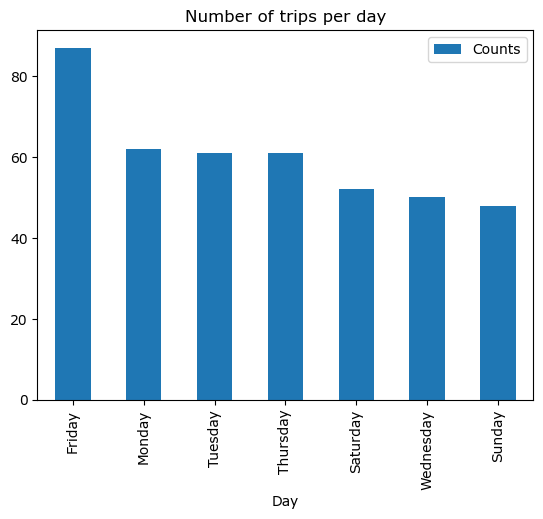

In [18]:
day_count.plot(
    x='Day',
    y='Counts',
    kind='bar',
    title='Number of trips per day')
    

In [20]:
average_distance=df.groupby('PURPOSE')['MILES'].mean().reset_index()
average_distance.columns=('Purpose','Average_Distance')
average_distance

,Purpose,Average_Distance
0,Between Offices,10.933333
1,Customer Visit,18.639130
2,Errand/Supplies,4.121277
3,Meal/Entertain,4.912500
4,Meeting,13.822222
5,Temporary Site,7.757143


<Axes: title={'center': 'Average distance for each ride'}, xlabel='Purpose'>

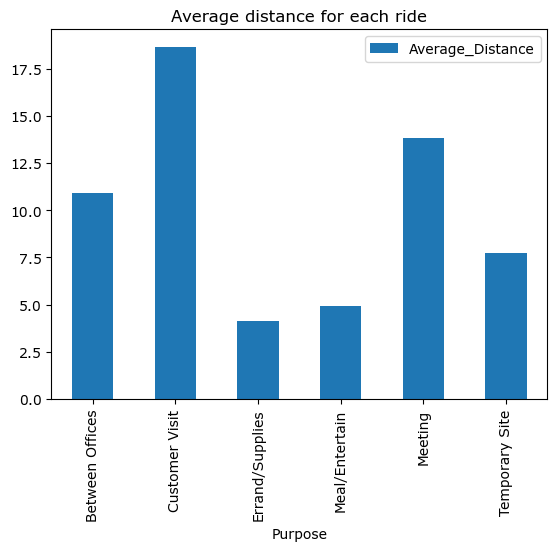

In [22]:
average_distance.plot(
    x='Purpose',
    y='Average_Distance',
    kind='bar',
    title='Average distance for each ride'
)